<a href="https://colab.research.google.com/github/guebin/IP2023WIN/blob/main/posts/Day3/08_ggplot2/2023-02-01-Lesson16.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# ref

<https://guebin.github.io/DV2022/posts/2022-10-06-5wk-2.html#훌륭한-시각화란>

<https://guebin.github.io/DV2022/posts/2022-10-06-5wk-2.html#read-mpg-data>

# imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

# 훌륭한 시각화란?

## 애드워드 터프티

`-` 데이터 시각화계의 거장 

`-` 터프티의 이론중 백미: 엄격한 미니멀리즘 

- 최소한의 잉크로 많은 정보를 전달할 수 있다면 그것이 바로 좋은 그래프이다. 
- 작은 지면 내에서 잉크를 최대한 적게 써서 짧은 시간 안에 많은 영감을 주어야 한다. 

`-` 데이터-잉크비: 데이터를 표현하는데 들아가는 잉크의 양 / 그래픽을 인쇄하는데 들어가는 잉크의 총량

`-` 차트정크 (나이젤홈즈의 그래프)

![](https://github.com/guebin/2021DV/blob/master/_notebooks/2021-10-06-fig1.jpeg?raw=true "그림1: <타임>에 수록된 나이젤홈즈의 작품")

>  “Lurking behind chartjunk is contempt both for information and for the audience. Chartjunk promoters imagine that numbers and details are boring, dull, and tedious, requiring ornament to enliven. Cosmetic decoration, which frequently distorts the data, will never salvage an underlying lack of content. If the numbers are boring, then you’ve got the wrong numbers (...) Worse is contempt for our audience, designing as if readers were obtuse and uncaring. In fact, consumers of graphics are often more intelligent about the information at hand than those who fabricate the data decoration (...) The operating moral premise of information design should be that our readers are alert and caring; they may be busy, eager to get on with it, but they are not stupid.”

- 차트정크 = 대중을 멸시 + 데이터에 대한 모독
- 차트정크 옹호가는 숫자와 데이터가 지루하여 활기가 필요하다고 생각하는 모양이다.. 

`-` 별로인 그래프 (왼쪽) / 우수한 그래프 오른쪽 

![](https://github.com/guebin/2021DV/blob/master/_notebooks/2021-10-05-fig2.jpeg?raw=true)

`-` 별로인 그래프 (왼쪽) / 우수한 그래프 오른쪽 

![](https://github.com/guebin/2021DV/blob/master/_notebooks/2021-10-05-fig3.jpeg?raw=true)

`-` 별로인 그래프 (왼쪽) / 우수한 그래프 오른쪽 

![](https://github.com/guebin/2021DV/blob/master/_notebooks/2021-10-05-fig4.jpeg?raw=true)

`-` 제 생각: 글쎄... 

## 찰스미나드의 도표 

- 인류역사상 가장 훌륭한 시각화

![](https://upload.wikimedia.org/wikipedia/commons/2/29/Minard.png)

`-` 터프티의 평 

- 지금까지 그려진 최고의 통계 그래픽일지도 모른다. 
- 여기에서는 군대의 크기, 2차원 평면상의 위치, 군대의 이동방향, 모스코바에서 퇴각하는 동안의 여러날짜, 온도 $\to$ 6차원의 변수
- 백만번에 한번 이런 그림을 그릴수는 있겠지만 이러한 멋진 그래픽을 만드는 방법에 대한 원칙은 없다. $\to$ 미니멀리즘..

`-` 왜 우수한 그래프일까? 

- 자료를 파악하는 기법은 최근까지도 산점도, 막대그래프, 라인플랏에 의존 
- 이러한 플랏의 단점은 고차원의 자료를 분석하기 어렵다는 것임 
- 미나드는 여러그램을 그리는 방법 대신에 한 그림에서 패널을 늘리는 방법을 선택함. 

## 미나드처럼 그리는게 왜 어려운가? 

`-` 몸무게, 키, 성별, 국적 

In [28]:
df1=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/male1.csv')
df2=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/male2.csv')  
df3=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/female.csv') 
df4=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/foreign.csv')

`-` 미나드의 접근방법 

In [29]:
_df = pd.concat([pd.concat([df1,df2],axis=1).assign(g='m'),df3.assign(g='f')])
df = pd.concat([_df.assign(g2='korea'),df4.assign(g2='foreign')]).reset_index(drop=True)
df

,w,h,g,g2
0,72.788217,183.486773,m,korea
1,66.606430,173.599877,m,korea
2,69.806324,173.237903,m,korea
3,67.449439,173.223805,m,korea
4,70.463183,174.931946,m,korea
...,...,...,...,...
1525,78.154632,188.324350,m,foreign
1526,74.754308,183.017979,f,foreign
1527,91.196208,190.100456,m,foreign
1528,87.770394,187.987255,m,foreign


<AxesSubplot:xlabel='w', ylabel='h'>

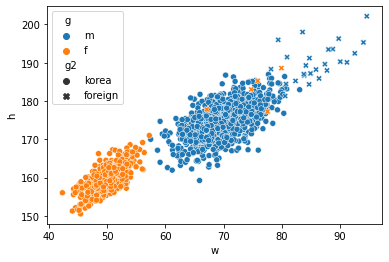

In [64]:
sns.scatterplot(data=df,x='w',y='h',hue='g',style='g2')

`-` 어려운점: (1) 센스가 없어서 hue/style을 이용하여 그룹을 구분할 생각을 못함 (2) long df (=tidy data) 형태로 데이터를 정리할 생각을 못함 (3) long df 형태로 데이터를 변형하는 코드를 모름 

1. 기획력부족 -> 훌륭한 시각화를 많이 볼 것 
2. 데이터프레임에 대한 이해부족 -> tidydata에 대한 개념
3. 프로그래밍 능력 -> 코딩공부열심히 (pandas를 엄청 잘해야함) 

# read mpg data 

`-` ref: https://r4ds.had.co.nz/index.html

In [31]:
mpg = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/mpg.csv')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


`-` 깃허브 저장소에 아예 데이터만 따로 모아서 관리하는 것도 좋은 방법입니다. 

## data 설명 

`-` `displ`: 자동차의 엔진크기 

`-` `hwy`: 연료의 효율, 동일한 연료로 얼마나 멀리 가느냐? 

`-` 자세한 설명은 R에서 `?mpg`를 이용해 스스로 찾아볼 것 

# p9를 이용한 산점도 (2차원) 

## python에서: plotnine을 이용한 산점도

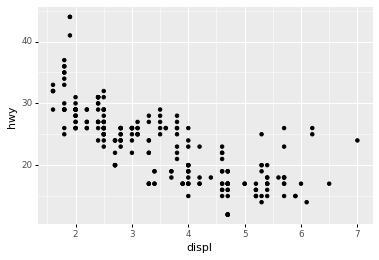

<ggplot: (8775336983373)>

In [35]:
ggplot(data=mpg) + geom_point(mapping=aes(x='displ',y='hwy')) ## plotnine

- 산점도 해석: 엔진크기가 클수록 효율이 낮음.

`-` 빠르게 그리기: `data=`와 `mapping=`은 생략가능함 

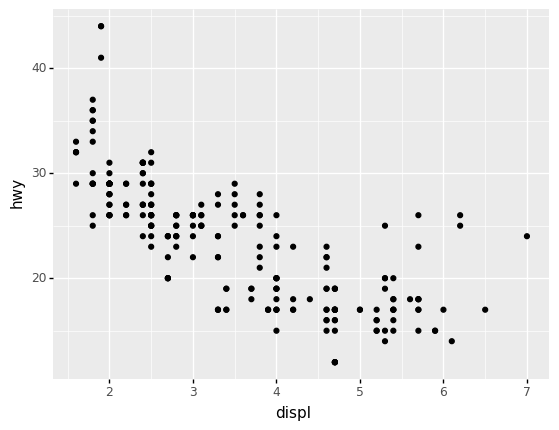

<ggplot: (8775336295029)>

In [39]:
ggplot(mpg) + geom_point(aes(x='displ',y='hwy')) ## plotnine

## 객체지향적인 느낌으로 산점도 그리기 

***step1: 도화지를 준비한다.***

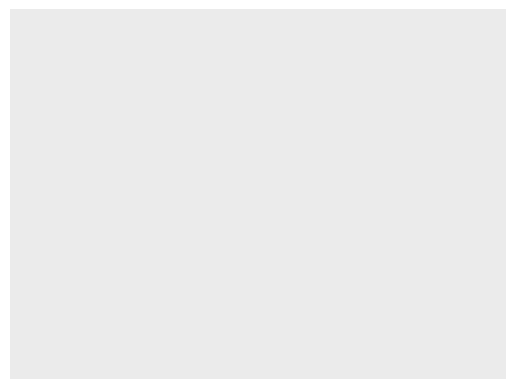

<ggplot: (8775336276849)>

In [40]:
fig = ggplot(data=mpg)
fig

***step2*** 변수와 에스테틱사이의 맵핑을 설정한다. 

In [42]:
a1= aes(x='displ',y='hwy')
a1

{'x': 'displ', 'y': 'hwy'}

***step3*** 점들의 집합을 만든다. 즉 포인트 지옴을 만든다. 

In [43]:
point1=geom_point(mapping=a1)

- geom_point(): 점들을 그려! 어떻게?
- `a1`에서 설정된 표를 보고

***step4*** 도화지와 지옴을 합친다. 

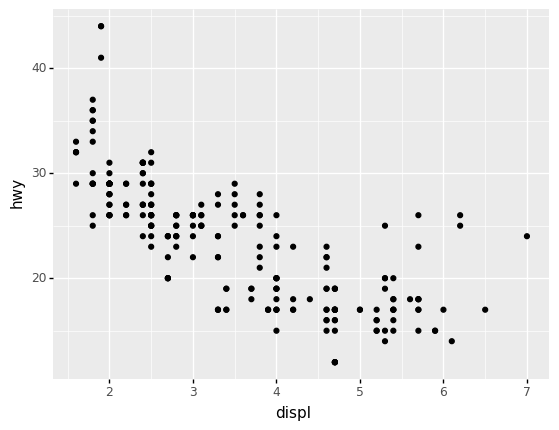

<ggplot: (8775335422437)>

In [48]:
fig+point1

# p9를 이용한 산점도 (3차원)

`-` 데이터를 다시 관찰 

In [110]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


`-` class도 함께 plot에 표시하면 데이터를 탐색할때 좀 더 좋을 것 같다. 

## 산점도 + 점크기변경 

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using size for a discrete variable is not advised.


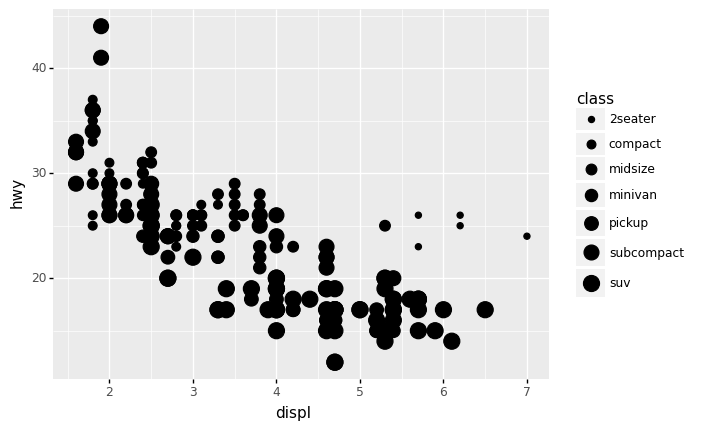

<ggplot: (8726734563561)>

In [111]:
ggplot(data=mpg) + geom_point(mapping = aes(x='displ',y='hwy',size='class'))

## 산점도 + 투명도변경 

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_alpha.py:70: PlotnineWarning: Using alpha for a discrete variable is not advised.


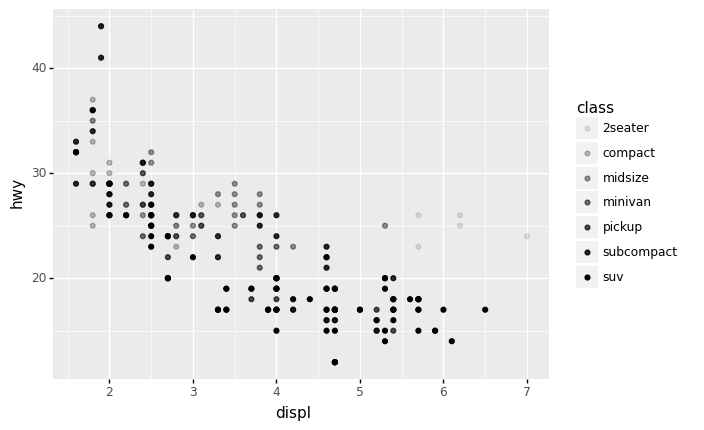

<ggplot: (8726734989121)>

In [112]:
ggplot(data=mpg) + geom_point(mapping = aes(x='displ',y='hwy',alpha='class'))

## 산점도 + 투명도/점크기를 동시에 적용 

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_alpha.py:70: PlotnineWarning: Using alpha for a discrete variable is not advised.
/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using size for a discrete variable is not advised.


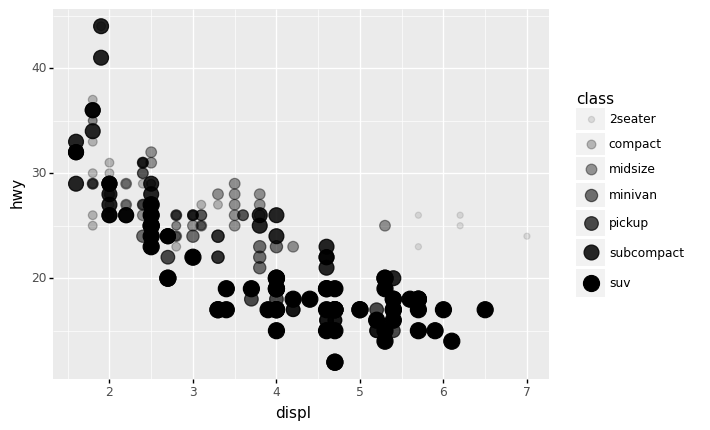

<ggplot: (8726734522405)>

In [113]:
ggplot(data=mpg) + geom_point(mapping = aes(x='displ',y='hwy',alpha='class',size='class'))

## 산점도 + 형태

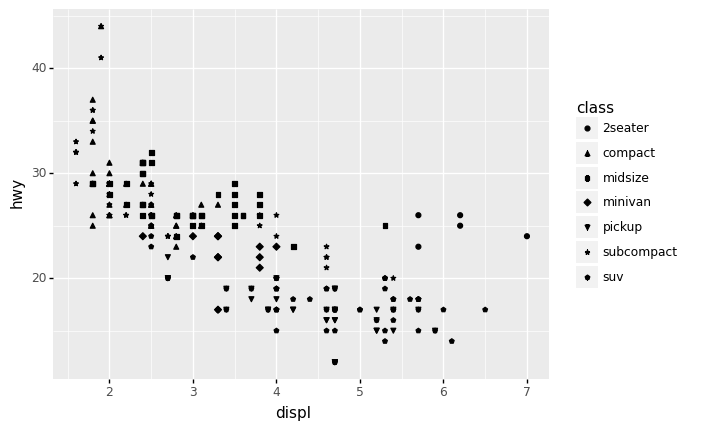

<ggplot: (8726734265229)>

In [114]:
ggplot(data=mpg) + geom_point(mapping = aes(x='displ',y='hwy',shape='class'))

## 산점도 + 색깔

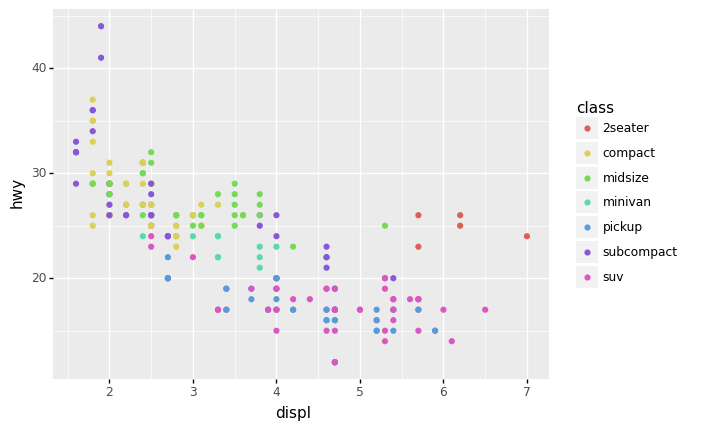

<ggplot: (8726734017473)>

In [115]:
ggplot(data=mpg) + geom_point(mapping = aes(x='displ',y='hwy',color='class'))

## 객체지향적 느낌으로? 

In [49]:
a2 = aes(x='displ', y='hwy', color='class') 

In [50]:
a1,a2

({'x': 'displ', 'y': 'hwy'}, {'x': 'displ', 'y': 'hwy', 'color': 'class'})

In [51]:
point2=geom_point(a2)

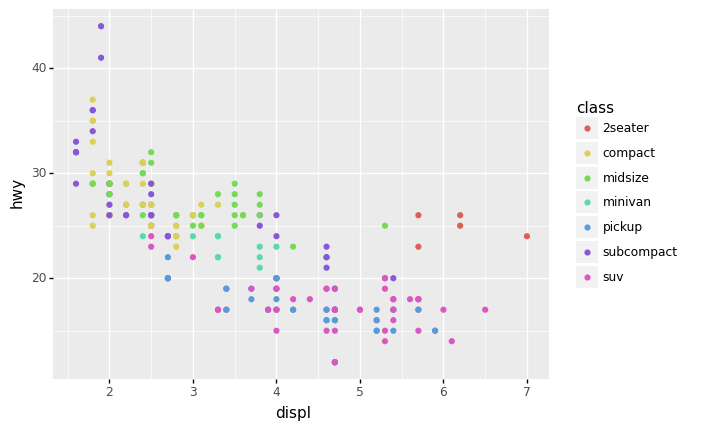

<ggplot: (8775335353217)>

In [54]:
fig+point2

## 산점도 + 색깔 + 적합선 

`-` 일단 색깔이 없는 포인트 지옴부터 연습

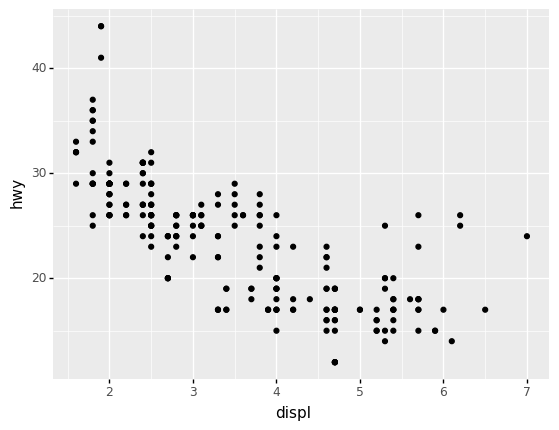

<ggplot: (8775335332061)>

In [55]:
fig+point1

In [57]:
line1 = geom_smooth(a1)

/home/cgb2/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


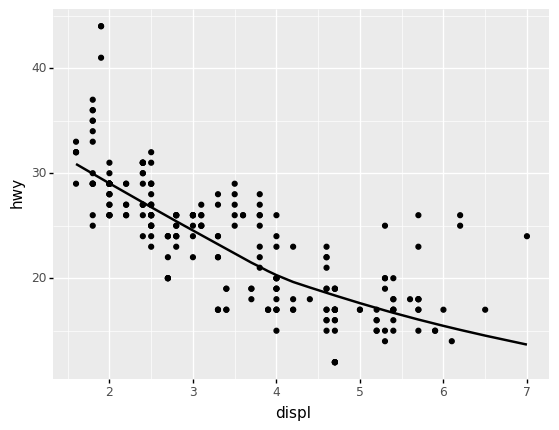

<ggplot: (8775334960069)>

In [63]:
fig+point1+line1

`-` point1(색깔없는 포인트 지옴)을 point2(색깔있는 포인트 지옴)으로 언제든지 바꿔치기 가능!

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


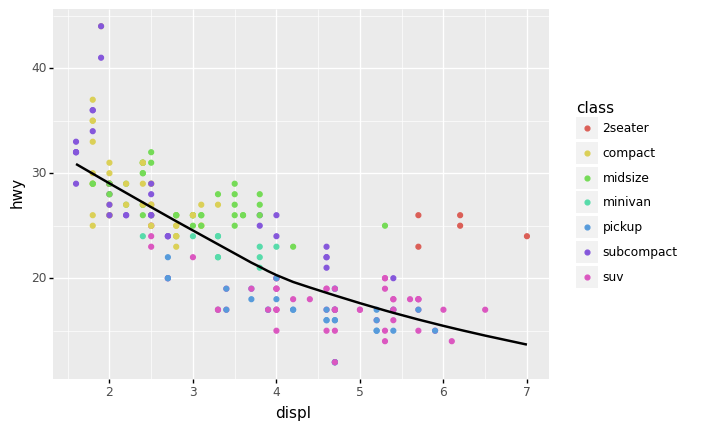

<ggplot: (8726732661565)>

In [136]:
fig+point2+line1

`-` 명령어로 한번에 그리기

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


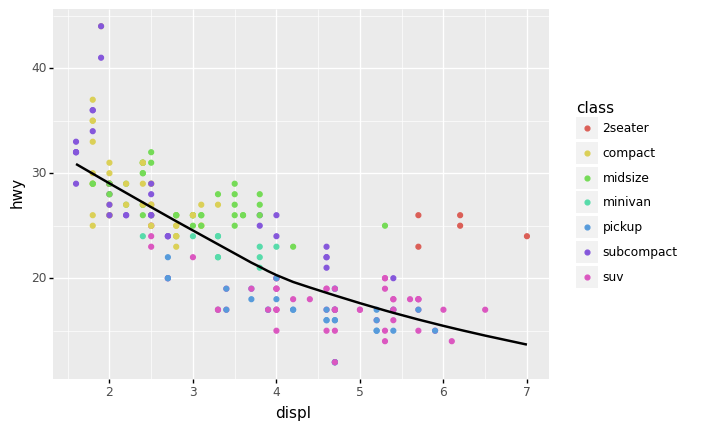

<ggplot: (8726732727485)>

In [142]:
ggplot(data=mpg) + \
geom_point(mapping=aes(x='displ',y='hwy',color='class')) + \
geom_smooth(mapping=aes(x='displ',y='hwy'))

`-` 공통적인 맵핑규칙은 ggplot()쪽으로 빼기도 한다. (figure를 선언하는 곳에서 공통으로 선언함) 

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


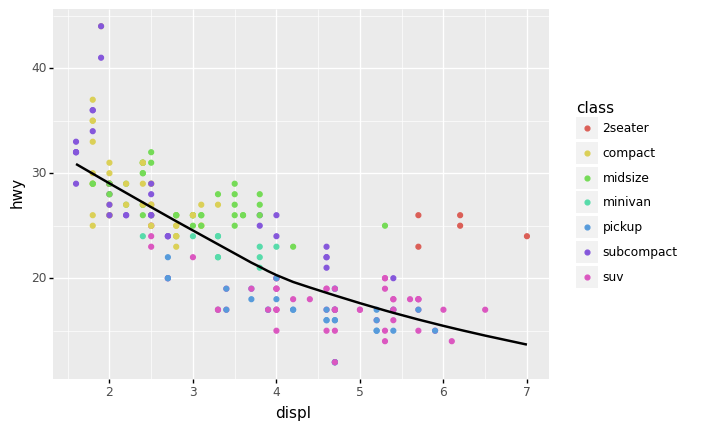

<ggplot: (8726733489953)>

In [143]:
ggplot(data=mpg,mapping=aes(x='displ',y='hwy')) + \
geom_point(mapping=aes(color='class')) + \
geom_smooth()

# p9를 이용한 산점도 (4차원)

`-` 데이터를 살펴보자. 

In [145]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## 산점도 + 점크기변경 + 색깔 

`-` drv (전륜, 후륜, 4륜 구동)에 따라서 데이터를 시각화 하고 싶다. 

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using size for a discrete variable is not advised.


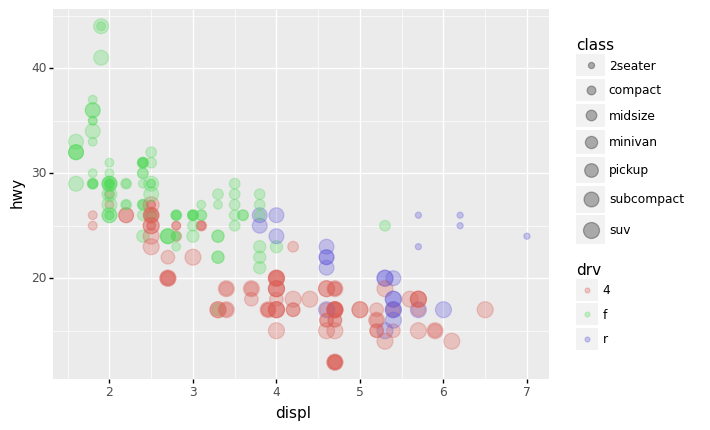

<ggplot: (8726731152845)>

In [151]:
ggplot(data=mpg, mapping=aes(x='displ',y='hwy')) + geom_point(mapping=aes(size='class',color='drv'),alpha=0.3)

- 모든 $x$에 대하여 붉은색 점들이 대부분 초록색과 보라색 점들에 비하여 아래쪽에 있음 $\to$ 4륜구동방식이 연비가 좋지 않음 

## 산점도 + 점크기변경 + 색깔 (객체지향버전) 

`-` 맵핑규칙 

In [64]:
a1,a2

({'x': 'displ', 'y': 'hwy'}, {'x': 'displ', 'y': 'hwy', 'color': 'class'})

In [65]:
a3 = a2.copy() 

In [67]:
a3['color'] = 'drv'
a3['size'] = 'class'
a3

{'x': 'displ', 'y': 'hwy', 'color': 'drv', 'size': 'class'}

- 아래와 같이 선언해도 괜찮음 
```Python
a3= aes(x='displ',y='hwy',color='drv',size='class')
```

In [68]:
point3=geom_point(a3)

/home/cgb2/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using size for a discrete variable is not advised.


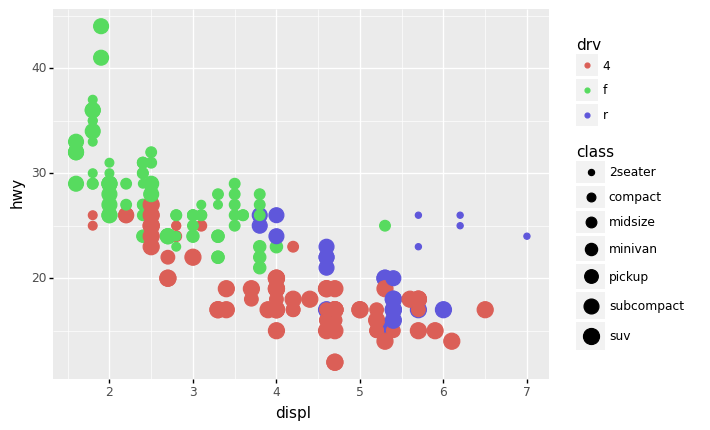

<ggplot: (8775334891765)>

In [69]:
fig+point3

- 그림의 전체적인 투명도를 조절하면 좋겠음 

/home/cgb2/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using size for a discrete variable is not advised.


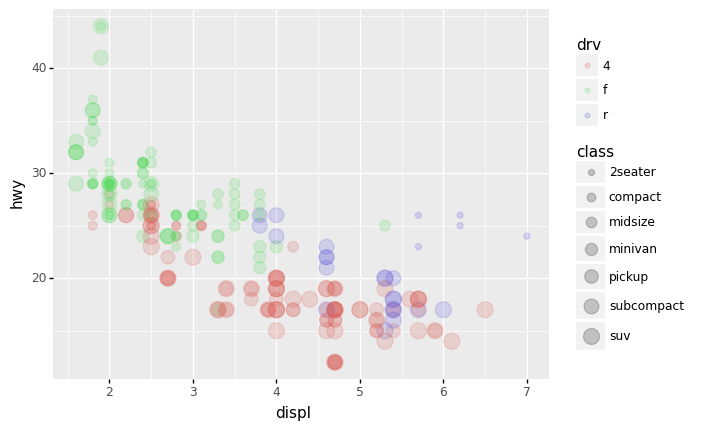

<ggplot: (8775333161077)>

In [72]:
point3=geom_point(a3,alpha=0.2)
fig+point3

## 산점도 + 점크기변경 + 색깔 + 선추가 

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using size for a discrete variable is not advised.
/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


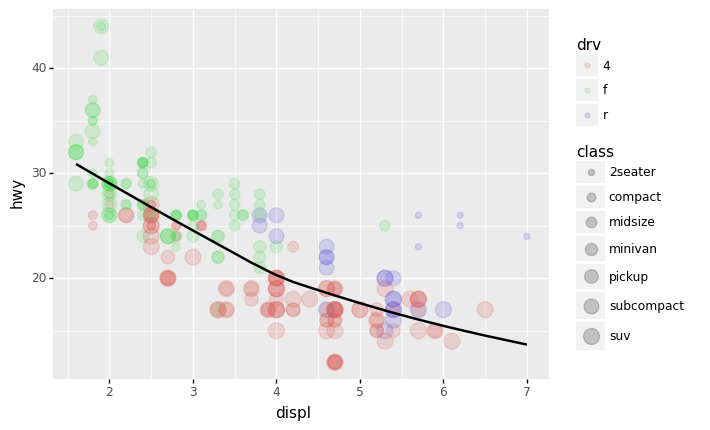

<ggplot: (8726730575253)>

In [172]:
fig+point3+line1

## 산점도 + 점크기변경 + 색깔 + drv별로 선추가 

`-` 맵핑규칙

In [73]:
a1,a2,a3

({'x': 'displ', 'y': 'hwy'},
 {'x': 'displ', 'y': 'hwy', 'color': 'class'},
 {'x': 'displ', 'y': 'hwy', 'color': 'drv', 'size': 'class'})

In [74]:
a4 = a2.copy() 
a4['color']='drv'
a4

{'x': 'displ', 'y': 'hwy', 'color': 'drv'}

In [77]:
line2 = geom_smooth(a4)

/home/cgb2/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using size for a discrete variable is not advised.
/home/cgb2/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


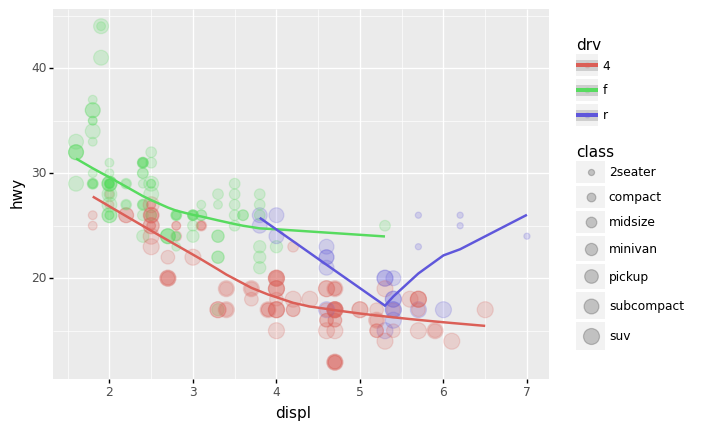

<ggplot: (8775336209333)>

In [82]:
fig + point3 +line2

`-` 선의 색깔을 동일하게 하고 선의 타입을 변경하여 drv를 표시하고 싶다면? 

In [179]:
a1,a2,a3,a4

({'x': 'displ', 'y': 'hwy'},
 {'x': 'displ', 'y': 'hwy', 'color': 'class'},
 {'x': 'displ', 'y': 'hwy', 'color': 'drv', 'size': 'class'},
 {'x': 'displ', 'y': 'hwy', 'color': 'drv'})

In [180]:
a5=a1.copy()
a5['linetype']='drv' 
a5

{'x': 'displ', 'y': 'hwy', 'linetype': 'drv'}

In [189]:
line3 = geom_smooth(a5,size=0.5,color='gray')

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using size for a discrete variable is not advised.
/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


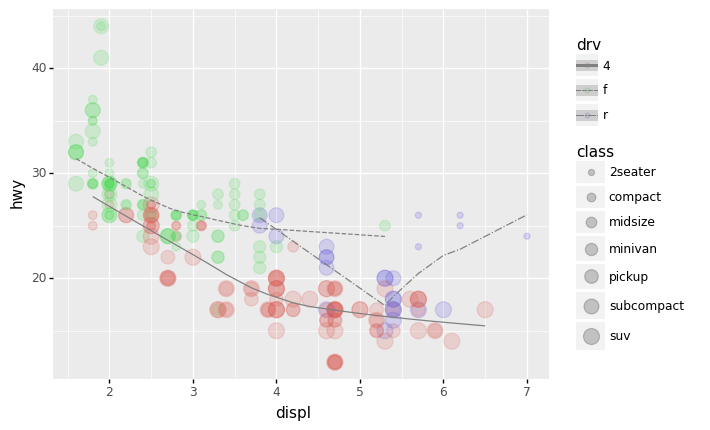

<ggplot: (8726732637457)>

In [193]:
fig+point3+line3

`-` 전체적인 추세선도 추가하고 싶다면? 

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using size for a discrete variable is not advised.
/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


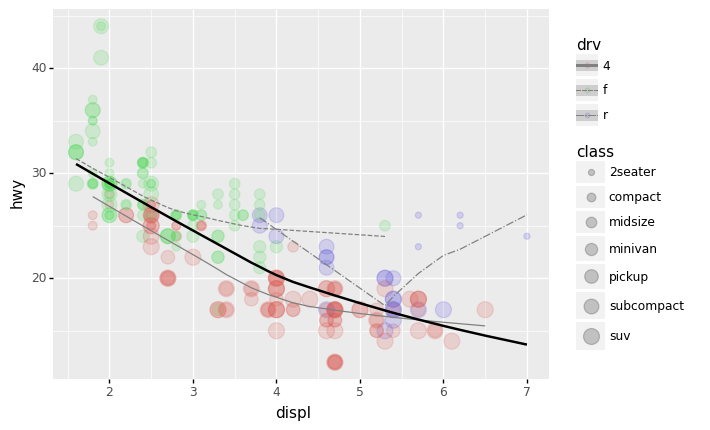

<ggplot: (8726732939513)>

In [194]:
fig+point3+line3+line1

`-` 그려보니까 역시 drv별로 그려지는 추세선은 색깔별로 구분하는게 좋겠음. 

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using size for a discrete variable is not advised.
/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


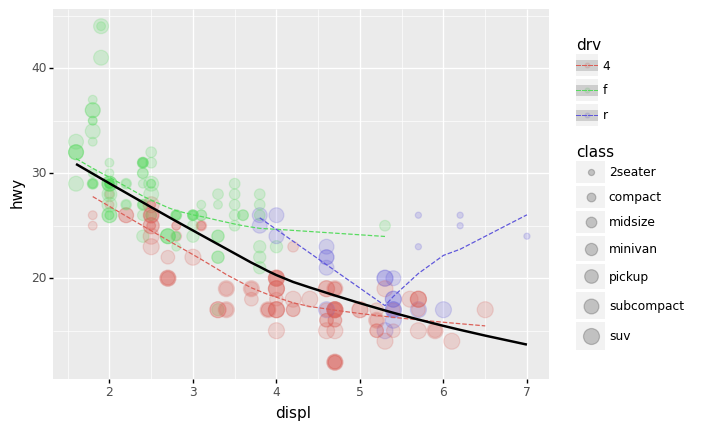

<ggplot: (8726733678229)>

In [197]:
line2 = geom_smooth(a4,size=0.5,linetype='dashed')
fig+point3+line2+line1

`-` 고차원을 변수를 표현할 수 있는 무기는 다양하다. 

- 산점도(포인트지옴): 점의크기, 점의형태, 점의색깔, 점의투명도
- 라인플랏(스무스지옴,라인지옴): 선의형태, 선의색깔, 선의굵기 

# 결론 

`-` 잘 훈련한다면 여러가지 형태의 고차원 그래프를 우리도 그릴 수 있다. (마치 미나드처럼) 

`-` 해들리위컴은 이러한 방법을 체계적으로 정리했다고 보여진다. 

`-` 해들리위컴: 그래프는 데이터 + 지옴 + 맵핑(변수와 에스테틱간의 연결) + 스탯(통계) + 포지션 + 축 + 패싯그리드 7개의 조합으로 그릴 수 있다. 

- 내생각: 지옴과 맵핑만 잘 다루어도 아주 다양한 그래프를 그릴 수 있음. 